# Term Deposit Subscription Prediction

## 1. Data Pre-processing

In [2]:
!pip install category_encoders


     |████                            | 10 kB 25.5 MB/s eta 0:00:01
     |████████                        | 20 kB 21.4 MB/s eta 0:00:01
     |████████████                    | 30 kB 10.9 MB/s eta 0:00:01
     |████████████████                | 40 kB 8.9 MB/s eta 0:00:01
     |████████████████████            | 51 kB 5.0 MB/s eta 0:00:01
     |████████████████████████        | 61 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████    | 71 kB 5.9 MB/s eta 0:00:01
     |███████████████████████████████▉| 81 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 377 kB/s 


In [1]:
!pip install imbalanced-learn

In [52]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report,accuracy_score, log_loss,precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Reading the csv file
df = pd.read_csv("bank-full.csv",sep=';')

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
# Checking for null values
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [10]:
# Replacing yes with 1 and no with 0
df.y = df.y.eq('yes').mul(1)
df.default = df.default.eq('yes').mul(1)
df.housing = df.housing.eq('yes').mul(1)
df.loan = df.loan.eq('yes').mul(1)

## 2. Ordinal Encoding

In [11]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['contact'],return_df=True,
                           mapping=[{'col':'contact',
'mapping':{'cellular':2, 'telephone':0, 'unknown':1}}])

In [12]:
df[['contact']] = encoder.fit_transform(df[['contact']])

In [13]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['month'],return_df=True,
                           mapping=[{'col':'month',
'mapping':{'apr':9, 'aug':11, 'dec':1, 'feb':7, 'jan':2, 'jul':10, 'jun':8, 'mar':3, 'may':12,
       'nov':6, 'oct':5, 'sep':4}}])

In [14]:
df[['month']] = encoder.fit_transform(df[['month']])

In [15]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['job'],return_df=True,
                           mapping=[{'col':'job',
'mapping':{'unemployed':0,'unknown':1,'student':2,'housemaid':3,'blue-collar':4,'technician':5,'services':6,
           'retired':7,'admin':8,'self-employed':9,'entrepreneur':10,'management':11}}])

In [16]:
df[['job']] = encoder.fit_transform(df[['job']])

In [17]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['marital'],return_df=True,
                           mapping=[{'col':'marital',
'mapping':{'single':0,'divorced':1,'married':2}}])

In [18]:
df[['marital']] = encoder.fit_transform(df[['marital']])

In [19]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['education'],return_df=True,
                           mapping=[{'col':'education',
'mapping':{'unknown':0,'primary':1,'secondary':2,'tertiary':3}}])

In [20]:
df[['education']] = encoder.fit_transform(df[['education']])

In [21]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['poutcome'],return_df=True,
                           mapping=[{'col':'poutcome',
'mapping':{'failure':0,'other':1,'unknown':2,'success':3}}])

In [22]:
df[['poutcome']] = encoder.fit_transform(df[['poutcome']])

In [23]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,11.0,2,3,0,2143,1,0,1,5,12,261,1,-1,0,2,0
1,44,5.0,0,2,0,29,1,0,1,5,12,151,1,-1,0,2,0
2,33,10.0,2,2,0,2,1,1,1,5,12,76,1,-1,0,2,0
3,47,4.0,2,0,0,1506,1,0,1,5,12,92,1,-1,0,2,0
4,33,1.0,0,0,0,1,0,0,1,5,12,198,1,-1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5.0,2,3,0,825,0,0,2,17,6,977,3,-1,0,2,1
45207,71,7.0,1,1,0,1729,0,0,2,17,6,456,2,-1,0,2,1
45208,72,7.0,2,2,0,5715,0,0,2,17,6,1127,5,184,3,3,1
45209,57,4.0,2,2,0,668,0,0,0,17,6,508,4,-1,0,2,0


## 3. Correlation and Heat Map

In [24]:
# Finding the correlation
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.078259,0.376104,-0.173615,-0.017879,0.097783,-0.185513,-0.015655,-0.122114,-0.009120,-0.086378,-0.004648,0.004760,-0.023758,0.001288,0.020678,0.025155
job,0.078259,1.000000,0.035643,0.376480,0.008913,0.067506,-0.063879,-0.015011,0.064248,0.022594,-0.027862,0.003221,0.023540,-0.023232,0.006032,0.007397,0.016835
marital,0.376104,0.035643,1.000000,-0.137510,-0.009584,0.020602,0.020202,0.046738,-0.058796,0.007701,0.022085,-0.022895,0.029121,-0.029490,-0.015676,0.007471,-0.065668
education,-0.173615,0.376480,-0.137510,1.000000,-0.009035,0.050572,-0.038689,0.004307,0.156922,0.021661,-0.046916,0.002554,0.000194,0.007092,0.025295,-0.009235,0.051341
default,-0.017879,0.008913,-0.009584,-0.009035,1.000000,-0.066745,-0.006025,0.077234,-0.000961,0.009424,0.015682,-0.010021,0.016822,-0.029979,-0.018329,0.022274,-0.022419
balance,0.097783,0.067506,0.020602,0.050572,-0.066745,1.000000,-0.068768,-0.084350,-0.002844,0.004503,-0.093798,0.021560,-0.014578,0.003435,0.016674,-0.004008,0.052838
housing,-0.185513,-0.063879,0.020202,-0.038689,-0.006025,-0.068768,1.000000,0.041323,-0.089783,-0.027982,0.244022,0.005075,-0.023599,0.124178,0.037076,-0.134047,-0.139173
loan,-0.015655,-0.015011,0.046738,0.004307,0.077234,-0.084350,0.041323,1.000000,0.015964,0.011370,0.014244,-0.012412,0.009980,-0.022754,-0.011043,-0.009605,-0.068185
contact,-0.122114,0.064248,-0.058796,0.156922,-0.000961,-0.002844,-0.089783,0.015964,1.000000,0.006302,-0.118184,0.029350,-0.046971,0.170654,0.091911,-0.142421,0.100822
day,-0.009120,0.022594,0.007701,0.021661,0.009424,0.004503,-0.027982,0.011370,0.006302,1.000000,-0.043602,-0.030206,0.162490,-0.093044,-0.051710,0.064721,-0.028348


<AxesSubplot:>

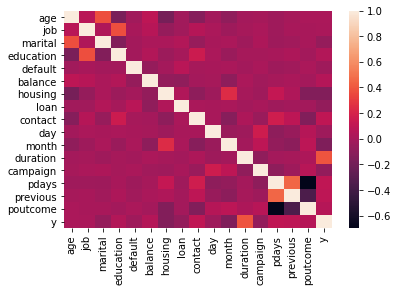

In [25]:
# Displaying the Heat Map
sns.heatmap(df.corr())

## 4. Training and Testing the Data

In [26]:
# training the dataset
np.random.seed(3)
X = df.drop("y", axis=1)
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Implimenting different models
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    GaussianNB(),
    SVC()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        train_predictions = clf.predict(X_train)
        acc = accuracy_score(y_train, train_predictions)
        print("Accuracy: {:.4%}".format(acc))
        print("precision_score: \n",precision_score(y_train, train_predictions))
        print("f1_score: \n",f1_score(y_train, train_predictions))
        print("confusion_matrix: \n",confusion_matrix(y_train, train_predictions))
        print("log_loss: \n",log_loss(y_train, train_predictions))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_train, train_predictions)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
precision_score: 
 1.0
f1_score: 
 1.0
confusion_matrix: 
 [[31970     0]
 [    0  4198]]
log_loss: 
 9.992007221626413e-16
RandomForestClassifier
****Results****
Accuracy: 99.9972%
precision_score: 
 1.0
f1_score: 
 0.9998808814770698
confusion_matrix: 
 [[31970     0]
 [    1  4197]]
log_loss: 
 0.000954954003399326
GradientBoostingClassifier
****Results****
Accuracy: 91.1165%
precision_score: 
 0.6852200075216247
f1_score: 
 0.5314277380778767
confusion_matrix: 
 [[31133   837]
 [ 2376  1822]]
log_loss: 
 3.0682857172057374


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
****Results****
Accuracy: 88.7801%
precision_score: 
 0.5488145048814504
f1_score: 
 0.27947443181818177
confusion_matrix: 
 [[31323   647]
 [ 3411   787]]
log_loss: 
 3.8752176495820865
GaussianNB
****Results****
Accuracy: 85.3655%
precision_score: 
 0.39190523198420535
f1_score: 
 0.4285868509122315
confusion_matrix: 
 [[28890  3080]
 [ 2213  1985]]
log_loss: 
 5.054639632225926
SVC
****Results****
Accuracy: 88.4152%
precision_score: 
 0.5666666666666667
f1_score: 
 0.015969938938468767
confusion_matrix: 
 [[31944    26]
 [ 4164    34]]
log_loss: 
 4.001257849043601


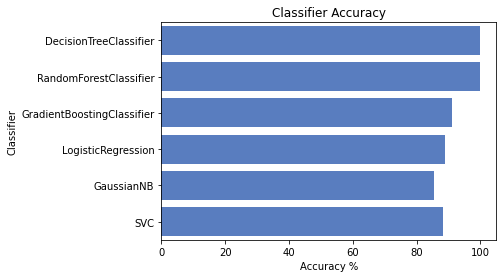

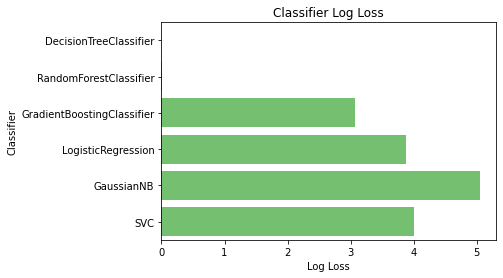

In [96]:
# Comparison between Classifier Accuracy and Accuracy Percentage 
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [97]:
# Implimenting different models
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    GaussianNB(),
    SVC()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        print("Accuracy: {:.4%}".format(acc))
        print("precision_score: \n",precision_score(y_test, train_predictions))
        print("f1_score: \n",f1_score(y_test, train_predictions))
        print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
        print("log_loss: \n",log_loss(y_test, train_predictions))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_test, train_predictions)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 87.8359%
precision_score: 
 0.4958371877890842
f1_score: 
 0.49355432780847147
confusion_matrix: 
 [[7407  545]
 [ 555  536]]
log_loss: 
 4.201381158354662
RandomForestClassifier
****Results****
Accuracy: 90.4014%
precision_score: 
 0.6512890094979648
f1_score: 
 0.525164113785558
confusion_matrix: 
 [[7695  257]
 [ 611  480]]
log_loss: 
 3.315256375906451
GradientBoostingClassifier
****Results****
Accuracy: 90.2908%
precision_score: 
 0.6554744525547446
f1_score: 
 0.5056306306306306
confusion_matrix: 
 [[7716  236]
 [ 642  449]]
log_loss: 
 3.3534484551282886
LogisticRegression
****Results****
Accuracy: 88.4330%


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


precision_score: 
 0.5596816976127321
f1_score: 
 0.28746594005449594
confusion_matrix: 
 [[7786  166]
 [ 880  211]]
log_loss: 
 3.9951003917118197
GaussianNB
****Results****
Accuracy: 84.9386%
precision_score: 
 0.3975812547241119
f1_score: 
 0.43579121789560893
confusion_matrix: 
 [[7155  797]
 [ 565  526]]
log_loss: 
 5.202084565854275
SVC
****Results****
Accuracy: 87.9465%
precision_score: 
 0.5384615384615384
f1_score: 
 0.012681159420289856
confusion_matrix: 
 [[7946    6]
 [1084    7]]
log_loss: 
 4.163139562981005


## Oversampling

In [27]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [28]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [29]:
print(Counter(y_ros))

Counter({0: 31970, 1: 31970})


## Hyperparameter Tuning

### 1. Decision Tree

In [88]:
param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range (1,10),
    "min_samples_split":range (1,10),
    "min_samples_leaf":range (1,5)
}

In [89]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid=param_dict,
                    cv = 5 ,
                    verbose = 1 ,
                    scoring = 'roc_auc',
                    n_jobs=-1)

grid.fit(X_ros,y_ros)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.71979981 0.71979981 0.71979981 0.71979981 0.71979981
 0.71979981 0.71979981 0.71979981        nan 0.71979981 0.71979981
 0.71979981 0.71979981 0.71979981 0.71979981 0.71979981 0.71979981
        nan 0.71979981 0.71979981 0.71979981 0.71979981 0.71979981
 0.71979981 0.71979981 0.71979981        nan 0.71979981 0.71979981
 0.71979981 0.71979981 0.71979981 0.71979981 0.71979981 0.71979981
        nan 0.79522488 0.79522488 0.79522488 0.79522488 0.79522488
 0.79522488 0.79522488 0.79522488        nan 0.79522488 0.79522488
 0.79522488 0.79522488 0.79522488 0.79522488 0.79522488 0.79522488
        nan 0.79522488 0.79522488 0.79522488 0.79522488 0.79522488
 0.79522488 0.79522488 0.79522488        nan 0.79522488 0.79522488
 0.79522488 0.79522488 0.79522488 0.79522488 0.79522488 0.79522488
        nan 0.83602388 0.83602388 0.83602388 0.836023

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='roc_auc', verbose=1)

In [90]:
print('Best Params: ', grid.best_params_)

Best Params:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [91]:
print('Best Score: ', grid.best_score_)

Best Score:  0.93228427906245


In [45]:
def met(model,X_train1,y_train1,X_test1,y_test1):
  model.fit(X_train1,y_train1)

  print('................Train .......................')

  y_train_pred=model.predict(X_train1)
  print(confusion_matrix(y_train1, y_train_pred), ": is the confusion matrix")
  print(accuracy_score(y_train1, y_train_pred), ": is the accuracy score")
  print(precision_score(y_train1, y_train_pred), ": is the precision score")
  print(f1_score(y_train1, y_train_pred), ": is the f1 score")
  print(roc_auc_score(y_train1, y_train_pred), ": is the roc auc score")
  print(log_loss(y_train1, y_train_pred), ": is the logloss")

  print('................Test.......................')

  y_pred=model.predict(X_test1)
  print(confusion_matrix(y_test1, y_pred), ": is the confusion matrix")
  print(accuracy_score(y_test1, y_pred), ": is the accuracy score")
  print(precision_score(y_test1, y_pred), ": is the precision score")
  print(f1_score(y_test1, y_pred), ": is the f1 score")
  print(roc_auc_score(y_test1, y_pred), ": is the roc auc score")
  print(log_loss(y_test1, y_pred), ": is the logloss")

In [93]:
model = DecisionTreeClassifier(criterion = 'gini',
                               max_depth = 9,
                               min_samples_leaf = 1,
                               min_samples_split = 6)

In [94]:
met(model,X_ros,y_ros,X_test,y_test)

................Train .......................
[[27579  4391]
 [ 3580 28390]] : is the confusion matrix
0.8753362527369409 : is the accuracy score
0.8660504560568623 : is the precision score
0.8768976540902843 : is the f1 score
0.8753362527369408 : is the roc auc score
4.305788202629795 : is the logloss
................Test.......................
[[6730 1222]
 [ 216  875]] : is the confusion matrix
0.8409819750082937 : is the accuracy score
0.4172627563185503 : is the precision score
0.5489335006273526 : is the f1 score
0.8241722332159779 : is the roc auc score
5.49239605926587 : is the logloss


### 2. Random Forest

In [104]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [15,20],
    'min_samples_leaf': [3,4],
    'min_samples_split': [3,4],
    'n_estimators': [1350,1400,1450,1500,1550,1600,1650]
}
# Create a based model
rf = RandomForestClassifier(max_features = 4, class_weight = 'balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid, 
                           cv = 5,
                           scoring = 'roc_auc',
                           n_jobs = -1, 
                           verbose = 1)

In [106]:
grid_search.fit(X_ros,y_ros)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_features=4),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [15, 20],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [3, 4],
                         'n_estimators': [1350, 1400, 1450, 1500, 1550, 1600,
                                          1650]},
             scoring='roc_auc', verbose=1)

In [107]:
print('Best Score: ', grid_search.best_score_)

Best Score:  0.9946912030153386


In [108]:
print('Best Params: ', grid_search.best_params_)

Best Params:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1500}


In [109]:
rfc = RandomForestClassifier(bootstrap = True,
                               max_depth = 20,
                               max_features = 4, 
                               min_samples_leaf = 3, 
                               min_samples_split = 3, 
                               n_estimators = 1500)

In [110]:
rfc.fit(X_ros,y_ros)
y_pred=rfc.predict(X_test)

In [111]:
met(rfc,X_ros,y_ros,X_test,y_test)

................Train .......................
[[30903  1067]
 [    7 31963]] : is the confusion matrix
0.9832030028151392 : is the accuracy score
0.967696033908568 : is the precision score
0.983476923076923 : is the f1 score
0.9832030028151393 : is the roc auc score
0.5801610731716007 : is the logloss
................Test.......................
[[7263  689]
 [ 281  810]] : is the confusion matrix
0.892734711931881 : is the accuracy score
0.5403602401601068 : is the precision score
0.6254826254826255 : is the f1 score
0.8278966304702643 : is the roc auc score
3.7048727220715216 : is the logloss


### 3. Logistic Regression

In [125]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = ['balanced']
solver = ['liblinear', 'saga']
param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)
grid = GridSearchCV(estimator=LogisticRegression(class_weight = 'balanced'),
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)

In [126]:
grid_result = grid.fit(X_ros, y_ros)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [127]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.8854824945853113


In [128]:
print('Best Params: ', grid_result.best_params_)

Best Params:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [129]:
model = LogisticRegression(C=0.1,class_weight='balanced',penalty='l1',solver='liblinear')

In [130]:
model.fit(X_ros,y_ros)
y_pred=model.predict(X_test)

In [131]:
met(model,X_ros,y_ros,X_test,y_test)

................Train .......................
[[26322  5648]
 [ 6772 25198]] : is the confusion matrix
0.8057553956834532 : is the accuracy score
0.8168968423782662 : is the precision score
0.8022796739684157 : is the f1 score
0.8057553956834533 : is the roc auc score
6.709041585096597 : is the logloss
................Test.......................
[[6520 1432]
 [ 226  865]] : is the confusion matrix
0.8166537653433595 : is the accuracy score
0.3765781454070527 : is the precision score
0.5106257378984652 : is the f1 score
0.8063850564431501 : is the roc auc score
6.33268122152847 : is the logloss


### 4. XGboost

In [35]:
from xgboost import XGBClassifier
estimator = XGBClassifier(
    objective= 'binary:logistic',
    njob = -1,
    cv = 5,
    scoring = 'roc_auc',
    seed=42
)

In [36]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'scale_pos_weight' : [7.5481,2.7473]
}

In [37]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    verbose=True
)

In [58]:
grid_search.fit(X_ros, y_ros)

In [40]:
print('Best Score: ', grid_search.best_score_)

Best Score:  0.9355020331560837


In [41]:
print('Best Params: ', grid_search.best_params_)

Best Params:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180, 'scale_pos_weight': 2.7473}


In [42]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, cv=5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=8, njob=-1, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=2.7473, scoring='roc_auc', seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
model = XGBClassifier(learning_rate = 0.1, max_depth=9, n_estimators=180,scale_pos_weight = 2.7473)
model.fit(X_ros, y_ros)

[22:02:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.7473, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
met(model,X_ros,y_ros,X_test,y_test)

[22:02:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
................Train .......................
[[29538  2432]
 [   12 31958]] : is the confusion matrix
0.9617766656240225 : is the accuracy score
0.9292817679558011 : is the precision score
0.9631705846895721 : is the f1 score
0.9617766656240224 : is the roc auc score
1.320217612294526 : is the logloss
................Test.......................
[[6939 1013]
 [ 188  903]] : is the confusion matrix
0.8671900917837001 : is the accuracy score
0.471294363256785 : is the precision score
0.6005986032590621 : is the f1 score
0.8501458452825108 : is the roc auc score
4.587181294093169 : is the logloss


### 5. Naive Bayes

In [113]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(),
                            param_grid=param_grid_nb, 
                            scoring = 'roc_auc',
                            verbose=1, 
                            cv=5, 
                            n_jobs=-1)

In [115]:
nbModel_grid.fit(X_ros, y_ros)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc', verbose=1)

In [116]:
print(nbModel_grid.best_estimator_)

GaussianNB(var_smoothing=1.519911082952933e-08)


In [117]:
print('Best Score: ', nbModel_grid.best_score_)

Best Score:  0.8345303194688404


In [118]:
print('Best Params: ', nbModel_grid.best_params_)

Best Params:  {'var_smoothing': 1.519911082952933e-08}


In [119]:
model = GaussianNB(var_smoothing=1.519911082952933e-08)

In [120]:
model.fit(X_ros,y_ros)
y_pred=model.predict(X_test)

In [121]:
met(model,X_ros,y_ros,X_test,y_test)

................Train .......................
[[24690  7280]
 [ 8287 23683]] : is the confusion matrix
0.7565373787926181 : is the accuracy score
0.7648806640183444 : is the precision score
0.75264169831408 : is the f1 score
0.7565373787926182 : is the roc auc score
8.408992073957874 : is the logloss
................Test.......................
[[6103 1849]
 [ 289  802]] : is the confusion matrix
0.7635740351653213 : is the accuracy score
0.3025273481705017 : is the precision score
0.4286477819347942 : is the f1 score
0.7512926435791651 : is the roc auc score
8.166027025098693 : is the logloss


## Hyperparameter Metrics :

In [54]:
#Final models
classifiers = [
    DecisionTreeClassifier(criterion= 'gini',
                               max_depth= 9,
                               min_samples_leaf= 1,
                               min_samples_split= 6,
                               class_weight = "balanced"
                              ),
    RandomForestClassifier(bootstrap = True,
                               max_depth = 20,
                               max_features = 4, 
                               min_samples_leaf = 3, 
                               min_samples_split = 3, 
                               n_estimators = 1500,
                            class_weight = "balanced"),
    LogisticRegression(C=0.1, class_weight="balanced", penalty='l1', solver='liblinear'),
    XGBClassifier(learning_rate = 0.1, max_depth=9, n_estimators=180,scale_pos_weight = 2.7473),
    GaussianNB(var_smoothing=1.519911082952933e-08)
]

# Logging for Visual Comparison
log_cols=["Classifier", "ROC"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_ros, y_ros)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print("-"*30)
        train_predictions_ros = clf.predict(X_ros)
        print("ROC AUC:\t",roc_auc_score(y_ros, train_predictions_ros))
        log_entry = pd.DataFrame([[name, roc_auc_score(y_ros, train_predictions_ros)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
------------------------------
ROC AUC:	 0.8753049734125744
RandomForestClassifier
------------------------------
ROC AUC:	 0.9841101032217704
LogisticRegression
------------------------------
ROC AUC:	 0.8054895214263371
[22:49:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
------------------------------
ROC AUC:	 0.9617766656240224
GaussianNB
------------------------------
ROC AUC:	 0.7564279011573349


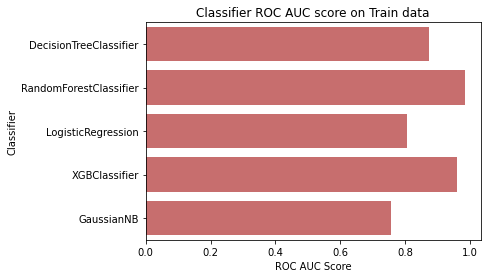

In [55]:
# Ploting ROC AUC on train data
sns.set_color_codes("muted")
sns.barplot(x='ROC', y='Classifier', data=log, color="r")

plt.xlabel('ROC AUC Score')
plt.title('Classifier ROC AUC score on Train data')
plt.show()


In [56]:
#Final models
classifiers = [
    DecisionTreeClassifier(criterion= 'gini',
                               max_depth= 9,
                               min_samples_leaf= 1,
                               min_samples_split= 6,
                               class_weight = "balanced"
                              ),
    RandomForestClassifier(bootstrap = True,
                               max_depth = 20,
                               max_features = 4, 
                               min_samples_leaf = 3, 
                               min_samples_split = 3, 
                               n_estimators = 1500,
                            class_weight = "balanced"),
    LogisticRegression(C=0.1, class_weight="balanced", penalty='l1', solver='liblinear'),
    XGBClassifier(learning_rate = 0.1, max_depth=9, n_estimators=180,scale_pos_weight = 2.7473),
    GaussianNB(var_smoothing=1.519911082952933e-08)
]

# Logging for Visual Comparison
log_cols=["Classifier", "ROC"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_ros, y_ros)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print("-"*30)
        train_predictions_ros = clf.predict(X_test)
        print("ROC AUC:\t",roc_auc_score(y_test, train_predictions_ros))
        log_entry = pd.DataFrame([[name, roc_auc_score(y_test, train_predictions_ros)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
------------------------------
ROC AUC:	 0.8235881835467433
RandomForestClassifier
------------------------------
ROC AUC:	 0.8268361313619573
LogisticRegression
------------------------------
ROC AUC:	 0.8063221791795687
[22:50:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
------------------------------
ROC AUC:	 0.8501458452825108
GaussianNB
------------------------------
ROC AUC:	 0.7549505903431589


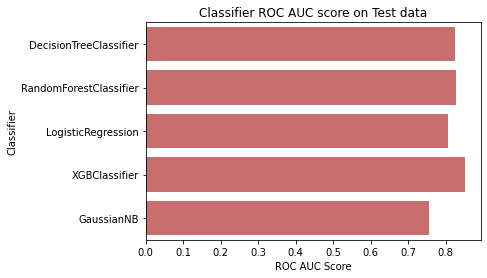

In [57]:
# Ploting ROC AUC on test data
sns.set_color_codes("muted")
sns.barplot(x='ROC', y='Classifier', data=log, color="r")

plt.xlabel('ROC AUC Score')
plt.title('Classifier ROC AUC score on Test data')
plt.show()

# HTML Page

### Created a Web Page where one could pass values of "Age", "Balance", "Duration", and "Poutcome"

In [ ]:
del(X_ros['job'])
del(X_ros['marital'])
del(X_ros['education'])
del(X_ros['default'])
del(X_ros['housing'])
del(X_ros['loan'])
del(X_ros['contact'])
del(X_ros['day'])
del(X_ros['month'])
del(X_ros['campaign'])
del(X_ros['pdays'])
del(X_ros['previous'])
del(X_ros['loan'])

In [33]:
del(X_test['job'])
del(X_test['marital'])
del(X_test['education'])
del(X_test['default'])
del(X_test['housing'])
del(X_test['loan'])
del(X_test['contact'])
del(X_test['day'])
del(X_test['month'])
del(X_test['campaign'])
del(X_test['pdays'])
del(X_test['previous'])
del(X_test['loan'])

In [65]:
y_predict= rfc.predict(X_test)

In [62]:
# Using pickle to link with the html page
import pickle
pickle.dump(xgb,open('output.pkl','wb'))
model=pickle.load(open('output.pkl','rb'))

# THE END